## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


Suggestion: follow the below plan of action:

* Get familiar with the data
* Select columns of interest
* Decide what to do with NaNs

* Make processing plan
* Develop code that works with a sample

* Adjust the code to work with Big data
* Test big data approach on a sample

* Run program with big data


In [2]:
#path_to_zips = '../data/Challenge/'
#searches_file = path_to_zips + 'searches.csv.bz2'
searches_file = 'searches.csv.bz2'
import pandas as pd

sample=pd.read_csv(searches_file,nrows=100000,sep='^')

In [3]:
pd.options.display.max_columns=None
sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


## Select the columns of interest

In [5]:
sample=sample[['Date','Destination']]
sample.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


## Make processing plan


* Filter Mad, Bcn, Agp
* Create YYYY-MM column
* Group by [destination, YYYY-MM]
* Sum
* Plot the results



### filter out the the searches for MAD, BCN, AGP

Take only the rows having MAD, BCN or AGP as destination

In [19]:
#extreamos en un DF las columnas
target_destination=['MAD','BCN','AGP']
#nos quedamos con aquellos registros que cumplan la condicion
searchers_of_interest=sample[sample['Destination'].isin(target_destination)]
searchers_of_interest.shape
#Hemos pasado de 100000 registros a 2200

(3663, 2)

In [20]:
#pasamos la columna date a fechas ya que es object
pd.to_datetime(searchers_of_interest['Date'])

4       2013-01-01
93      2013-01-01
113     2013-01-01
147     2013-01-01
151     2013-01-01
165     2013-01-01
177     2013-01-01
186     2013-01-01
188     2013-01-01
208     2013-01-01
229     2013-01-01
242     2013-01-01
253     2013-01-01
322     2013-01-01
365     2013-01-01
375     2013-01-01
406     2013-01-01
458     2013-01-01
481     2013-01-01
500     2013-01-01
509     2013-01-01
541     2013-01-01
593     2013-01-01
606     2013-01-01
618     2013-01-01
623     2013-01-01
628     2013-01-01
633     2013-01-01
641     2013-01-01
674     2013-01-01
           ...    
99271   2013-04-10
99292   2013-04-10
99324   2013-04-10
99348   2013-04-10
99353   2013-04-10
99373   2013-04-10
99381   2013-04-10
99397   2013-04-10
99400   2013-04-10
99485   2013-04-10
99511   2013-04-10
99538   2013-04-10
99560   2013-04-10
99615   2013-04-10
99633   2013-04-10
99656   2013-04-10
99668   2013-04-10
99690   2013-04-10
99711   2013-04-10
99713   2013-04-10
99716   2013-04-10
99718   2013

In [21]:
#Otra forma, tratandolo como string, sabiendo en la posicion que va el mes. Es un slicing sobre la columna
#ganamos con esto bastante simplicidad en el código
#searchers_of_interest['Date'].str[:7]
searchers_of_interest['DepMonth']=searchers_of_interest['Date'].str[:7]

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


We need to get the month from the Date column

We cannot use a datetime function on 'date' column as it is string

Options:

* Using string and obtaining yyyy-mm directly from it

* Transforming string to date:      

  * parse_dates=['Date'] - in csv_read function

  * pd.to_datetime  - function

### Option 1) use directly pd.to_datetime()

### Option 2) get PlotDate directly from the string

## group by arr_port search month

In [22]:
searches_per_month=searchers_of_interest.groupby(['Destination','DepMonth']).count()

In [23]:
searches_per_month.columns=['Searches']
searches_per_month.head()

Searches
Destination DepMonth          
AGP         2013-01        169
            2013-02        147
            2013-03        187
            2013-04         31
BCN         2013-01        517

In [24]:
#ver informacion de pivots
#queremos una columna por cada linea a dibujar (una columna para MAD) y en la fila el mes, esto se hace con pivot.
#tenemos que pasar a pivot: index, columns and values.
# el index identifica las filas queremos que sean los meses
# las columnas, destination
# los valores, searches
#reset_index resetea el indice.
#guardamos en un df
data2plot=searches_per_month.reset_index().pivot('DepMonth','Destination','Searches')

## 4.3 Plotting

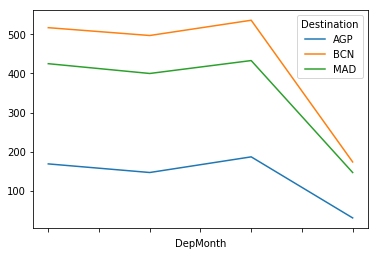

In [25]:
%matplotlib inline
data2plot.plot()
#FALTA MAD QUE NO SALE, REVISAR

## 5) Adjust the code to work with Big data

In [26]:
searches=pd.read_csv(searches_file,sep='^',nrows=100000,chunksize=10000)
partial_results=[]

for chunk in searches:
    
    target_destination=['MAD','BCN','AGP']
    searchers_of_interest=chunk[chunk['Destination'].isin(target_destination)]
    searchers_of_interest['DepMonth']=searchers_of_interest['Date'].str[:7]
    searches_per_month=searchers_of_interest.groupby(['Destination','DepMonth'])['Date'].count()

    partial_results.append(searches_per_month)
    
all_results=pd.concat(partial_results)

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
#ahora hay que agrupar y sumar
aggregated=all_results.groupby(['Destination','DepMonth']).sum()

In [30]:
#cogemos los resultados, los reseteamos indice y pivotamos para representarlos de la forma que queremos
data2plot=aggregated.reset_index().pivot('DepMonth','Destination','Date')
data2plot

Destination,AGP,BCN,MAD
DepMonth,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


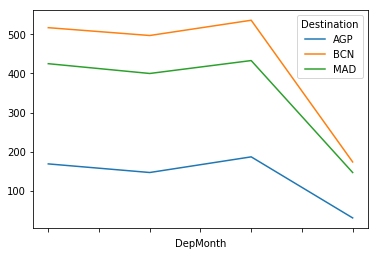

In [31]:
data2plot.plot()

In [33]:
%%time
#ahora vamos a ver los registros de tiempo y ver por donde va
from datetime import datetime
#ahora sobre el total de datos, sin nrows.
searches=pd.read_csv(searches_file,sep='^',chunksize=2e6)
partial_results=[]

for chunk_num,chunk in enumerate(searches):
    print('Start processing chunk %d at %s' % (chunk_num, datetime.now()))
    target_destination=['MAD','BCN','AGP']
    searchers_of_interest=chunk[chunk['Destination'].isin(target_destination)]
    searchers_of_interest['DepMonth']=searchers_of_interest['Date'].str[:7]
    searches_per_month=searchers_of_interest.groupby(['Destination','DepMonth'])['Date'].count()

    partial_results.append(searches_per_month)
    
all_results=pd.concat(partial_results)
aggregated=all_results.groupby(['Destination','DepMonth']).sum()
data2plot=aggregated.reset_index().pivot('DepMonth','Destination','Date')

<string>:2: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.


Start processing chunk 0 at 2018-06-01 20:30:35.767978


/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Start processing chunk 1 at 2018-06-01 20:31:07.760041
Start processing chunk 2 at 2018-06-01 20:31:41.990581
Start processing chunk 3 at 2018-06-01 20:32:14.161869
Start processing chunk 4 at 2018-06-01 20:32:45.674259
Start processing chunk 5 at 2018-06-01 20:33:18.499677
Start processing chunk 6 at 2018-06-01 20:33:50.262845
Start processing chunk 7 at 2018-06-01 20:34:22.364407
Start processing chunk 8 at 2018-06-01 20:34:54.241244
Start processing chunk 9 at 2018-06-01 20:35:26.790030


<string>:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.


Start processing chunk 10 at 2018-06-01 20:35:33.890095
CPU times: user 5min 13s, sys: 12.1 s, total: 5min 25s
Wall time: 5min 27s


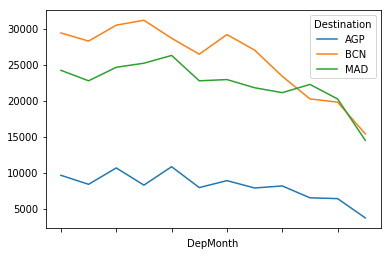

In [34]:
data2plot.plot()